In [51]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter

np.random.seed(42)

In [52]:
wires = 6
dev = qml.device("lightning.qubit", wires=wires, shots=10000)

In [53]:
def global_cost_simple(rotations):
    for i in range(wires):
        qml.RX(rotations[0][i], wires=i)
        qml.RY(rotations[1][i], wires=i)
    return qml.probs(wires=range(wires))

def local_cost_simple(rotations):
    for i in range(wires):
        qml.RX(rotations[0][i], wires=i)
        qml.RY(rotations[1][i], wires=i)
    return [qml.probs(wires=i) for i in range(wires)]

global_circuit = qml.QNode(global_cost_simple, dev, interface="autograd")

local_circuit = qml.QNode(local_cost_simple, dev, interface="autograd")

def cost_local(rotations):
    return 1 - np.sum([i for (i, _) in local_circuit(rotations)]) / wires

def cost_global(rotations):
    return 1 - global_circuit(rotations)[0]

In [54]:
RX = np.random.uniform(low=-np.pi, high=np.pi)
RY = np.random.uniform(low=-np.pi, high=np.pi)
rotations = [[RX for i in range(wires)], [RY for i in range(wires)]]

Global Cost:  0.9746000
Local Cost:  0.4592000


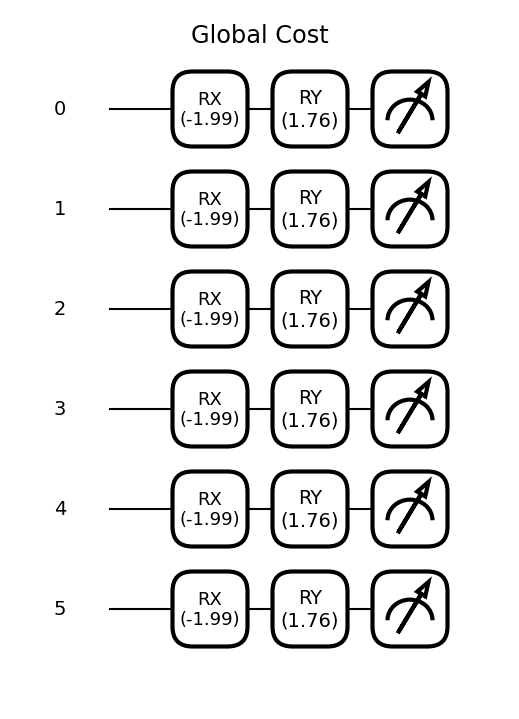

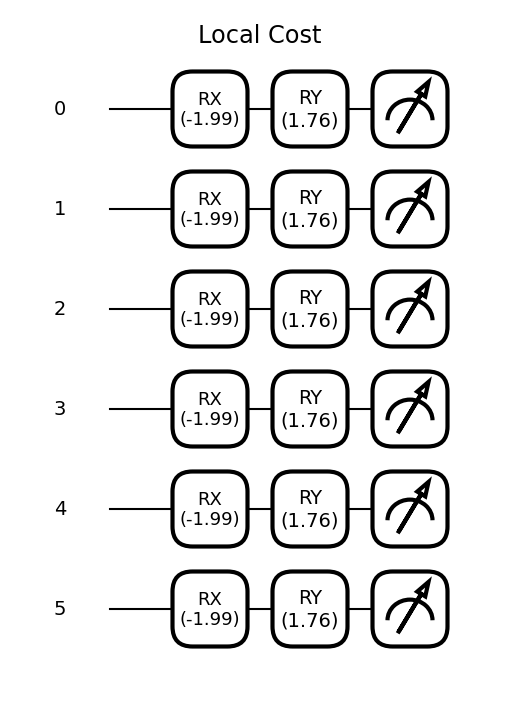

In [55]:
print("Global Cost: {: .7f}".format(cost_global(rotations)))
print("Local Cost: {: .7f}".format(cost_local(rotations)))

qml.drawer.use_style('black_white')
fig1, ax1 = qml.draw_mpl(global_circuit, decimals=2)(rotations)
fig1.suptitle("Global Cost", fontsize='xx-large')
plt.show()

fig2, ax2 = qml.draw_mpl(local_circuit, decimals=2)(rotations)
fig2.suptitle("Local Cost", fontsize='xx-large')
plt.show()

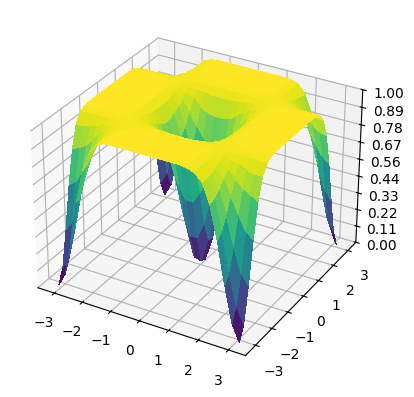

In [56]:
def generate_surface(cost_function):
    Z = []
    Z_assembler = []

    X = np.arange(-np.pi, np.pi, 0.25)
    Y = np.arange(-np.pi, np.pi, 0.25)
    X, Y = np.meshgrid(X, Y)

    for x in X[0, :]:
        for y in Y[:, 0]:
            rotations = [[x for i in range(wires)], [y for i in range(wires)]]
            Z_assembler.append(cost_function(rotations))
        Z.append(Z_assembler)
        Z_assembler = []

    Z = np.asarray(Z)
    return Z

def plot_surface(surface):
    X = np.arange(-np.pi, np.pi, 0.25)
    Y = np.arange(-np.pi, np.pi, 0.25)
    X, Y = np.meshgrid(X, Y)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    surf = ax.plot_surface(X, Y, surface, cmap="viridis", linewidth=0, antialiased=False)
    ax.set_zlim(0, 1)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
    plt.show()


global_surface = generate_surface(cost_global)
plot_surface(global_surface)

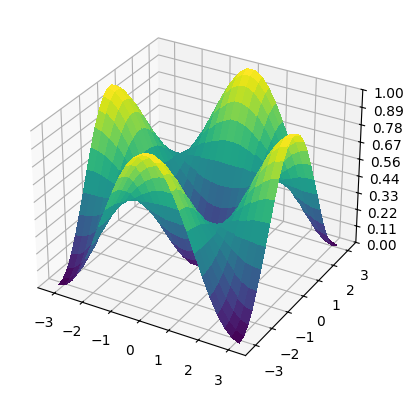

In [57]:
local_surface = generate_surface(cost_local)
plot_surface(local_surface)

In [58]:
def global_cost_simple(rotations):
    for i in range(wires):
        qml.RX(rotations[0][i], wires=i)
        qml.RY(rotations[1][i], wires=i)
    for i in range(wires - 1):
        qml.CNOT([i, i + 1])
    return qml.probs(wires=range(wires))

def local_cost_simple(rotations):
    for i in range(wires):
        qml.RX(rotations[0][i], wires=i)
        qml.RY(rotations[1][i], wires=i)
    for i in range(wires - 1):
        qml.CNOT([i, i + 1])
    return qml.probs(wires=[0])

global_circuit = qml.QNode(global_cost_simple, dev, interface="autograd")

local_circuit = qml.QNode(local_cost_simple, dev, interface="autograd")

def cost_local(rotations):
    return 1 - local_circuit(rotations)[0]

def cost_global(rotations):
    return 1 - global_circuit(rotations)[0]

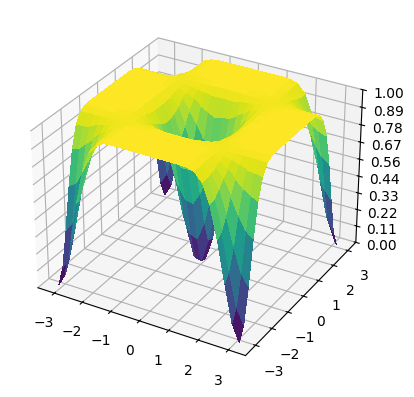

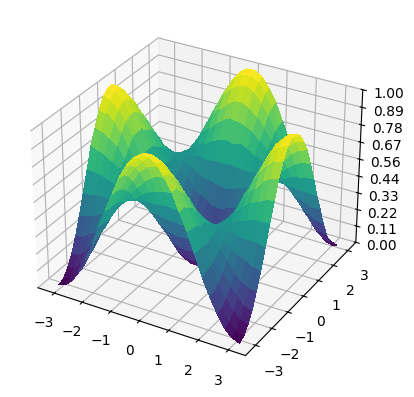

In [59]:
global_surface = generate_surface(cost_global)
plot_surface(global_surface)

local_surface = generate_surface(cost_local)
plot_surface(local_surface)

c:\Users\shrey\miniconda3\Lib\site-packages\pennylane\_grad.py:216: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(


Cost after step     5:  1.0000000
Cost after step    10:  1.0000000
Cost after step    15:  1.0000000
Cost after step    20:  1.0000000
Cost after step    25:  1.0000000
Cost after step    30:  1.0000000
Cost after step    35:  1.0000000
Cost after step    40:  1.0000000
Cost after step    45:  1.0000000
Cost after step    50:  1.0000000
Cost after step    55:  1.0000000
Cost after step    60:  1.0000000
Cost after step    65:  1.0000000
Cost after step    70:  1.0000000
Cost after step    75:  1.0000000
Cost after step    80:  1.0000000
Cost after step    85:  1.0000000
Cost after step    90:  1.0000000
Cost after step    95:  1.0000000
Cost after step   100:  1.0000000


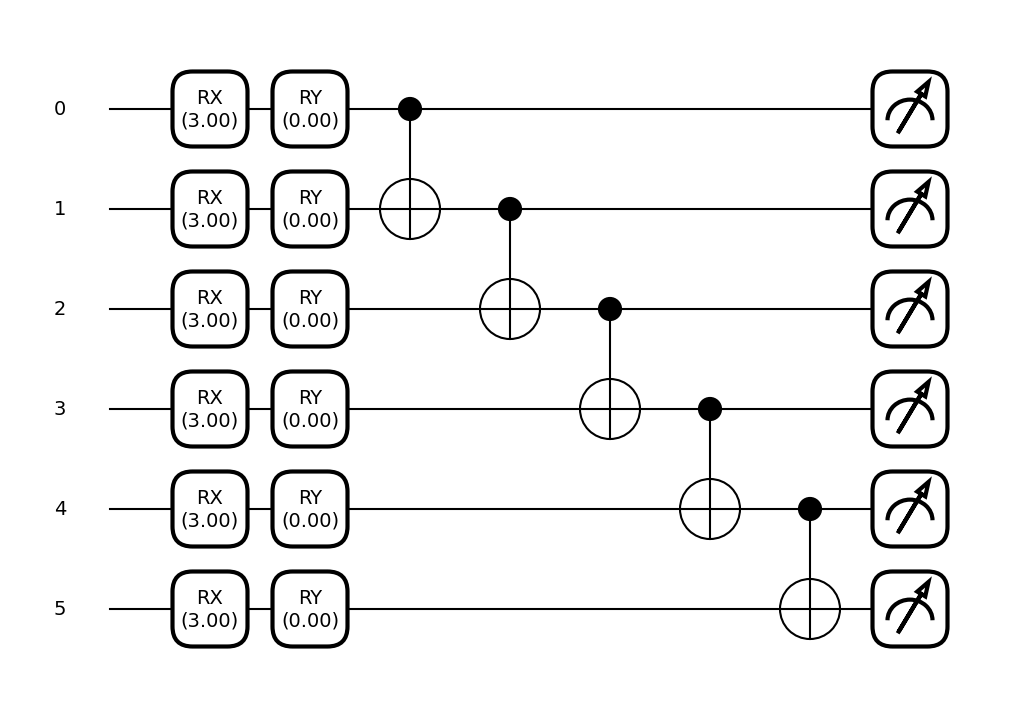

In [60]:
rotations = np.array([[3.] * len(range(wires)), [0.] * len(range(wires))])
opt = qml.GradientDescentOptimizer(stepsize=0.2)
steps = 100
params_global = rotations
for i in range(steps):
    # update the circuit parameters
    params_global = opt.step(cost_global, params_global)

    if (i + 1) % 5 == 0:
        print("Cost after step {:5d}: {: .7f}".format(i + 1, cost_global(params_global)))
    if cost_global(params_global) < 0.1:
        break
fig, ax = qml.draw_mpl(global_circuit, decimals=2)(params_global)
plt.show()

c:\Users\shrey\miniconda3\Lib\site-packages\pennylane\_grad.py:216: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(


Cost after step 1 :- 0.9964
Cost after step 6 :- 0.9954
Cost after step 11 :- 0.9954
Cost after step 16 :- 0.9951
Cost after step 21 :- 0.9942
Cost after step 26 :- 0.9953
Cost after step 31 :- 0.9943
Cost after step 36 :- 0.9946
Cost after step 41 :- 0.9953
Cost after step 46 :- 0.9959
Cost after step 51 :- 0.9938
Cost after step 56 :- 0.9945
Cost after step 61 :- 0.995
Cost after step 66 :- 0.9953
Cost after step 71 :- 0.9968
Cost after step 76 :- 0.995
Cost after step 81 :- 0.9949
Cost after step 86 :- 0.9954
Cost after step 91 :- 0.994
Cost after step 96 :- 0.9943


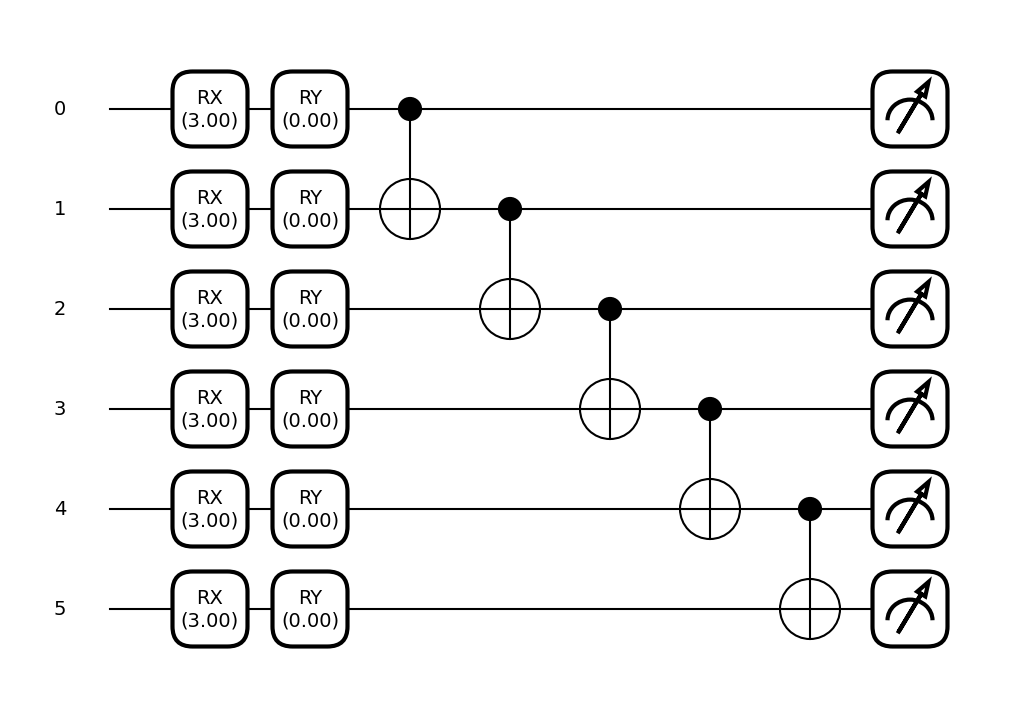

In [61]:
rotations = np.array([[3.] * len(range(wires)), [0.] * len(range(wires))])
opt = qml.GradientDescentOptimizer(stepsize=0.2)

steps = 100
params_local = rotations

for i in range(steps):
    params_local = opt.step(cost_local, params_local)
    
    if(i % 5) == 0:
        print(f"Cost after step {i + 1} :- {cost_local(params_local)}")
    if(cost_local(params_local)) < 0.05:
        break
fig, ax = qml.draw_mpl(global_circuit, decimals=2)(params_global)
plt.show()

In [62]:
_dev = qml.device("lightning.qubit", wires=wires, shots=None)
global_circuit = qml.QNode(global_cost_simple, _dev, interface="autograd")
print(
    "Current cost: "
    + str(cost_global(params_local))
    + ".\nInitial cost: "
    + str(cost_global([[3.0 for i in range(wires)], [0 for i in range(wires)]]))
    + ".\nDifference: "
    + str(
        cost_global([[3.0 for i in range(wires)], [0 for i in range(wires)]])
        - cost_global(params_local)
    )
)

Current cost: 0.9999999999999843.
Initial cost: 0.9999999999999843.
Difference: 0.0


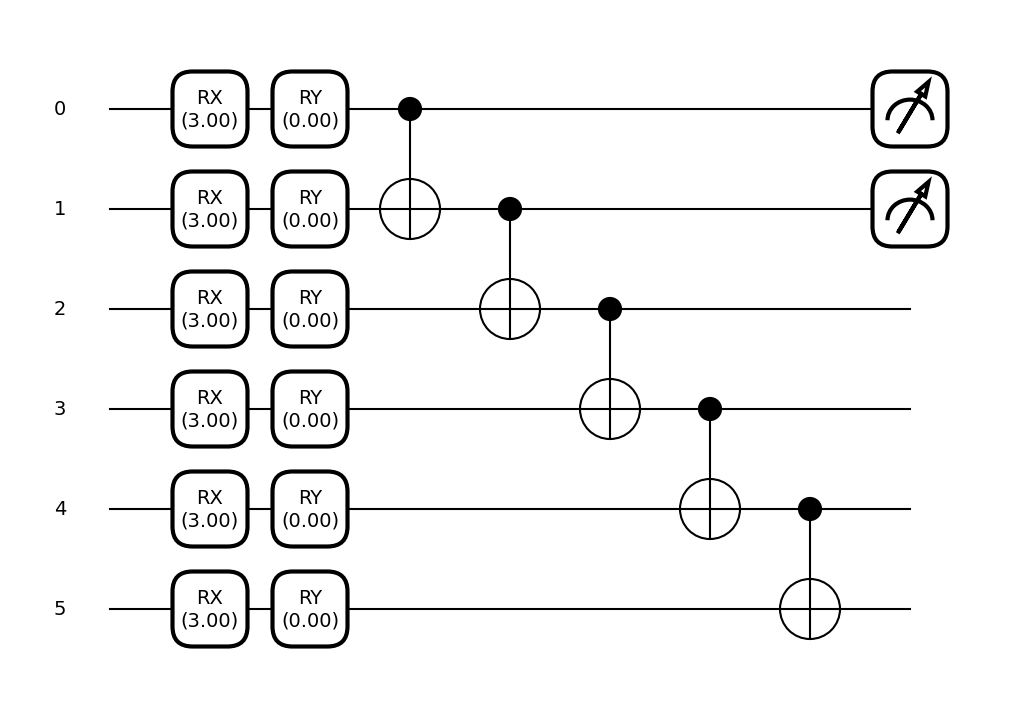

1.0
Cost after step    10:  1.0000000. Locality: 2
Cost after step    20:  1.0000000. Locality: 2


c:\Users\shrey\miniconda3\Lib\site-packages\pennylane\_grad.py:216: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(


Cost after step    30:  1.0000000. Locality: 2
Cost after step    40:  1.0000000. Locality: 2
Cost after step    50:  1.0000000. Locality: 2
Cost after step    60:  0.9999000. Locality: 2
Cost after step    70:  0.9999000. Locality: 2
Cost after step    80:  1.0000000. Locality: 2
Cost after step    90:  1.0000000. Locality: 2
Cost after step   100:  1.0000000. Locality: 2
Cost after step   110:  1.0000000. Locality: 2
Cost after step   120:  0.9999000. Locality: 2
Cost after step   130:  1.0000000. Locality: 2
Cost after step   140:  0.9999000. Locality: 2
Cost after step   150:  1.0000000. Locality: 2
Cost after step   160:  1.0000000. Locality: 2
Cost after step   170:  0.9999000. Locality: 2
Cost after step   180:  0.9999000. Locality: 2
Cost after step   190:  1.0000000. Locality: 2
Cost after step   200:  1.0000000. Locality: 2
Cost after step   210:  1.0000000. Locality: 2
Cost after step   220:  1.0000000. Locality: 2
Cost after step   230:  1.0000000. Locality: 2
Cost after st

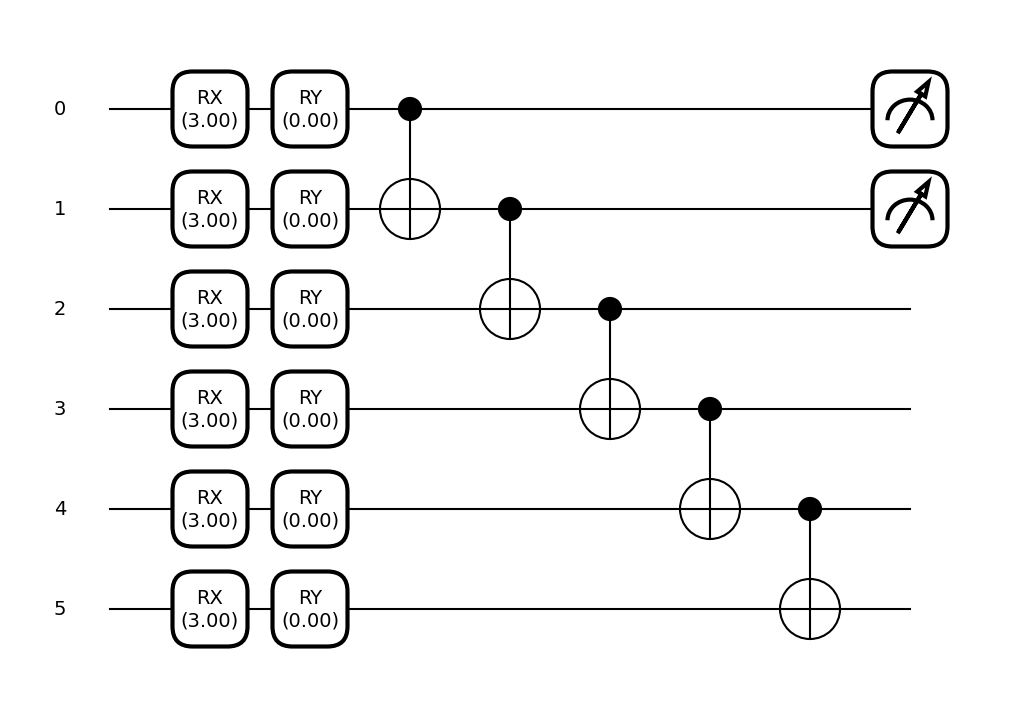

In [63]:
def tunable_cost_simple(rotations):
    for i in range(wires):
        qml.RX(rotations[0][i], wires=i)
        qml.RY(rotations[1][i], wires=i)
    for i in range(wires - 1):
        qml.CNOT([i, i + 1])
    return qml.probs(range(locality))

def cost_tunable(rotations):
    return 1 - tunable_circuit(rotations)[0]

tunable_circuit = qml.QNode(tunable_cost_simple, dev, interface="autograd")
locality = 2
params_tunable = params_local
fig, ax = qml.draw_mpl(tunable_circuit, decimals=2)(params_tunable)
plt.show()
print(cost_tunable(params_tunable))

locality = 2
opt = qml.GradientDescentOptimizer(stepsize=0.9)
steps = 600
for i in range(steps):
    # update the circuit parameters
    params_tunable = opt.step(cost_tunable, params_tunable)

    runCost = cost_tunable(params_tunable)
    if (i + 1) % 10 == 0:
        print(
            "Cost after step {:5d}: {: .7f}".format(i + 1, runCost)
            + ". Locality: "
            + str(locality)
        )

    if runCost < 0.1 and locality < wires:
        print("---Switching Locality---")
        locality += 1
        continue
    elif runCost < 0.1 and locality >= wires:
        break
fig, ax = qml.draw_mpl(tunable_circuit, decimals=2)(params_tunable)
plt.show()